## 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
import matplotlib as mat
import matplotlib.font_manager as fonm

font_list = [font.name for font in fonm.fontManager.ttflist]
# for f in font_list:
#     print(f"{f}.ttf")

mat.rcParams['font.family'] = 'Hancom Gothic'

In [3]:
def str_col(df):
    col = []
    for i in range(0,len(df.dtypes)):
        if str(df.dtypes[i]) == 'object':
            col.append(df.dtypes.index[i])
    print(col)        
    return col


def int_col(df):
    col = []
    for i in range(0,len(df.dtypes)):
        if str(df.dtypes[i]) != 'object':
            col.append(df.dtypes.index[i])
    print(col)        
    return col 

def p_100(a, b):
    print( round( (a/(a+b))*100,2), "%" )
    
def extraction_func(df, col_name, num_list):
    temp = pd.DataFrame()
    for i in num_list:
        temp = pd.concat([ temp, df.loc[df[col_name] == i ] ],axis=0)
    return temp
def unique_check(df):
    
    for i in range(0,len(df.columns)):
        if df[df.columns[i]].isnull().sum() > 0:
            print("Impossible if there are None : ",df.columns[i])
        
    col_1 = []
    col_2 = []
    for i in range(0,len(df.columns)):
        if type(df[df.columns[i]][0]) == str:
            col_1.append(df.columns[i])
            
            if df[df.columns[i]].nunique() > 5:
                col_2.append(df.columns[i])
                print(df.columns[i],"컬럼의 unique 개수는 ",df[df.columns[i]].nunique(),"개")
                
    return col_1, col_2    

In [4]:
insurance = pd.read_csv('./temp_data/insurance.csv',encoding='utf-8')
print(insurance.shape)
print(insurance.dtypes)
print(insurance.isnull().sum())
insurance.tail(5)

(20585, 30)
CUST_ID               int64
SIU_CUST_YN          object
SEX                  object
AGE                   int64
RESI_COST           float64
RESI_TYPE_CODE      float64
FP_CAREER            object
CUST_RGST           float64
CTPR                 object
OCCP_GRP_1           object
OCCP_GRP_2           object
TOTALPREM           float64
MINCRDT             float64
MAXCRDT             float64
WEDD_YN              object
CHLD_CNT            float64
LTBN_CHLD_AGE       float64
CUST_INCM           float64
RCBASE_HSHD_INCM      int64
JPBASE_HSHD_INCM    float64
CLAIM_NUM           float64
ACCI_DVSN             int64
HOUSE_HOSP_DIST     float64
DMND_RESN_CODE        int64
HEED_HOSP_YN         object
SUM_ORIG_PREM       float64
DISTANCE            float64
RESN_DATE_NUM       float64
CUST_ROLE             int64
PAYM_AMT            float64
dtype: object
CUST_ID             0
SIU_CUST_YN         0
SEX                 0
AGE                 0
RESI_COST           0
RESI_TYPE_CODE      0
FP

,CUST_ID,SIU_CUST_YN,SEX,AGE,RESI_COST,RESI_TYPE_CODE,FP_CAREER,CUST_RGST,CTPR,OCCP_GRP_1,...,CLAIM_NUM,ACCI_DVSN,HOUSE_HOSP_DIST,DMND_RESN_CODE,HEED_HOSP_YN,SUM_ORIG_PREM,DISTANCE,RESN_DATE_NUM,CUST_ROLE,PAYM_AMT
20580,875,Y,남,49,17083.0,20.0,N,4810.0,경남,5.서비스,...,7.0,3,10.848571,2,N,345140.0,3.000000,5.0,2,418285.714286
20581,21483,N,여,30,31944.0,20.0,N,4810.0,경기,1.주부,...,10.0,3,10.719000,5,N,72531.0,15.857143,2.0,5,282420.400000
20582,21940,N,여,23,45972.0,20.0,N,4230.0,경기,8.기타,...,5.0,3,5.916000,3,N,116947.0,23.000000,2.0,2,97181.800000
20583,20356,N,남,15,27777.0,20.0,N,4810.0,경기,8.기타,...,2.0,3,20.480000,5,N,65440.0,24.000000,1.0,2,217000.000000
20584,17118,N,여,18,21527.0,20.0,N,4810.0,경기,8.기타,...,2.0,3,0.670000,5,N,125399.0,2.500000,1.0,5,260000.000000


In [5]:
insurance = insurance.astype({'RESI_TYPE_CODE': str,
                             'MINCRDT':str,
                             'MAXCRDT':str,
                             'ACCI_DVSN':str,
                             'DMND_RESN_CODE':str,
                             'CUST_ROLE':str})

## 데이터 복사

In [6]:
copy_insurance = insurance.copy()

## 비식별화 및 고유값이 많은 컬럼 삭제 
 - unique한 값이 많으면 인코딩이 어려움으로 해당하는 컬럼들 삭제 
 - 실제로 컬럼삭제를 진행하지 않은 결과 인코딩 시 차원이 60000여개로 늘어나는 문제 발생

In [7]:
col_1, col_2 = unique_check(copy_insurance)

RESI_TYPE_CODE 컬럼의 unique 개수는  10 개
CTPR 컬럼의 unique 개수는  17 개
OCCP_GRP_1 컬럼의 unique 개수는  8 개
OCCP_GRP_2 컬럼의 unique 개수는  25 개
MINCRDT 컬럼의 unique 개수는  10 개
MAXCRDT 컬럼의 unique 개수는  10 개
DMND_RESN_CODE 컬럼의 unique 개수는  8 개
CUST_ROLE 컬럼의 unique 개수는  7 개


In [8]:
col_2.remove('RESI_TYPE_CODE')
col_2.remove('OCCP_GRP_1')
col_2.remove('MINCRDT')
col_2.remove('MAXCRDT')
col_2.remove('DMND_RESN_CODE')
col_2.remove('CUST_ROLE')

# index를 CUST_ID로 변경
copy_insurance.set_index('CUST_ID', inplace=True)

copy_insurance.drop(col_2, axis=1, inplace=True)

## 데이터 파악하기

#### 변수간 상관관계 확인

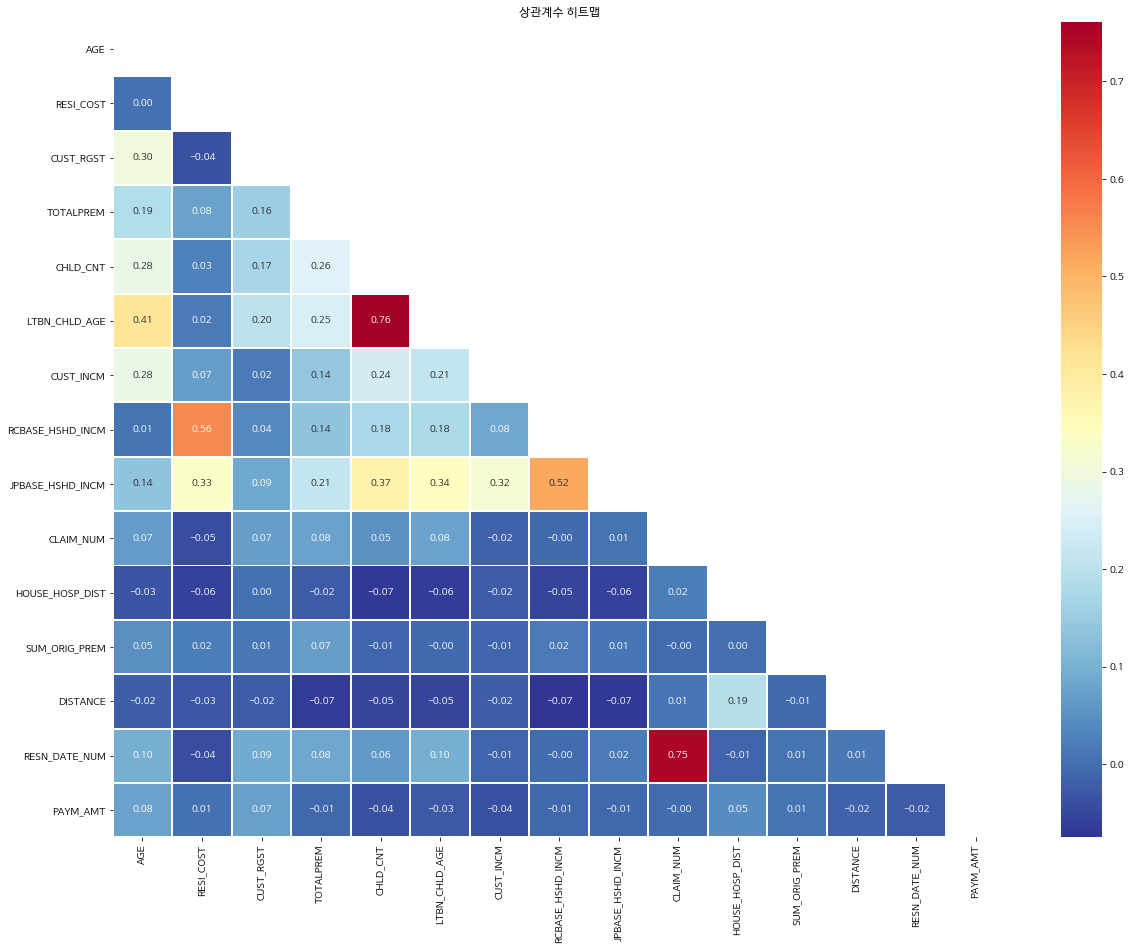

In [9]:
### 필요한 모듈 불러오기
#%matplotlib inline	# 시각화 결과를 Jupyter Notebook에서 바로 보기
# import matplotlib.pyplot as plt    # 모듈 불러오기

### 상관계수 테이블
corr = copy_insurance.corr()    # 'df'라는 데이터셋을 'corr'라는 이름의 상관계수 테이블로 저장 

### 상관계수 히트맵 그리기

# 히트맵 사이즈 설정
plt.figure(figsize = (20, 15))	

# 히트맵 형태 정의. 여기서는 삼각형 형태(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(corr, dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True

# 히트맵 그리기
sns.heatmap(data = corr,    # 'corr' = 상관계수 테이블
            annot = True,  # 히트맵에 값 표시
            mask=mask,   # 히트맵 형태. 여기서는 위에서 정의한 삼각형 형태
            fmt = '.2f',   # 값 표시 방식. 소숫점 2번째자리까지 
            linewidths = 1.,  # 경계면 실선 구분 여부
            cmap = 'RdYlBu_r')  # 사용할 색 지정 ('python colormap 검색')
plt.title('상관계수 히트맵')
plt.show()

##### 연관성이 높은 컬럼 제거

In [10]:
copy_insurance = copy_insurance[copy_insurance.columns.difference(['LTBN_CHLD_AGE','JPBASE_HSHD_INCM'])]

#### 데이터가 정규분포를 이루는지 확인하기
 - 최소 최대 정규화: 모든 feature들의 스케일이 동일하지만, 이상치(outlier)를 잘 처리하지 못한다. (X - MIN) / (MAX-MIN) 
 - Z-점수 정규화(표준화) : 이상치(outlier)를 잘 처리하지만, 정확히 동일한 척도로 정규화 된 데이터를 생성하지는 않는다. (X - 평균) / 표준편차

In [11]:
plot_target = int_col(copy_insurance)

['AGE', 'CHLD_CNT', 'CLAIM_NUM', 'CUST_INCM', 'CUST_RGST', 'DISTANCE', 'HOUSE_HOSP_DIST', 'PAYM_AMT', 'RCBASE_HSHD_INCM', 'RESI_COST', 'RESN_DATE_NUM', 'SUM_ORIG_PREM', 'TOTALPREM']


AGE 의 가우시안 분포 확인


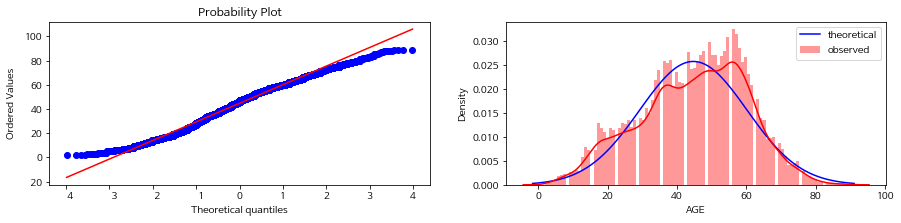


CHLD_CNT 의 가우시안 분포 확인


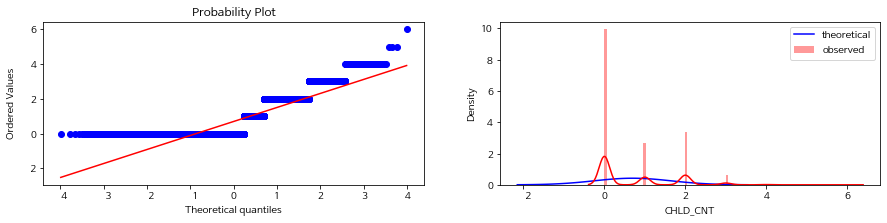


CLAIM_NUM 의 가우시안 분포 확인


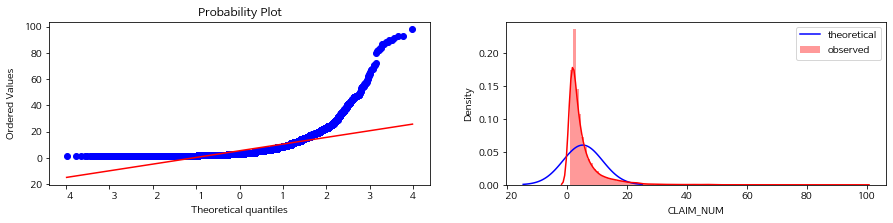


CUST_INCM 의 가우시안 분포 확인


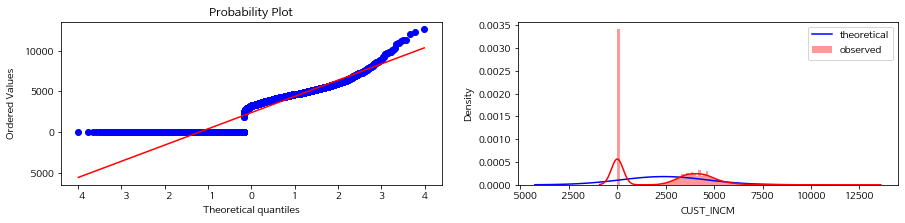


CUST_RGST 의 가우시안 분포 확인


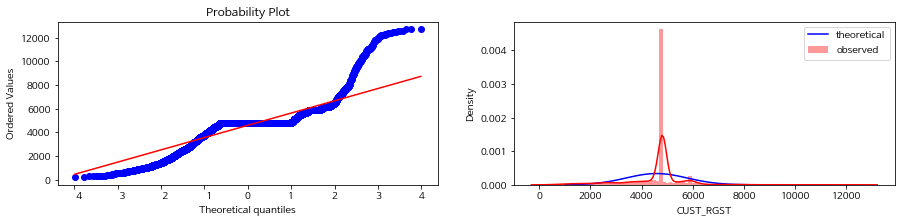


DISTANCE 의 가우시안 분포 확인


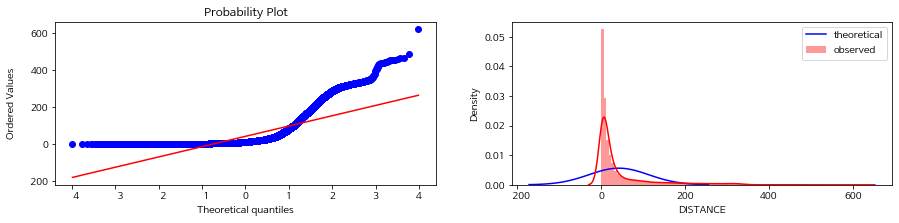


HOUSE_HOSP_DIST 의 가우시안 분포 확인


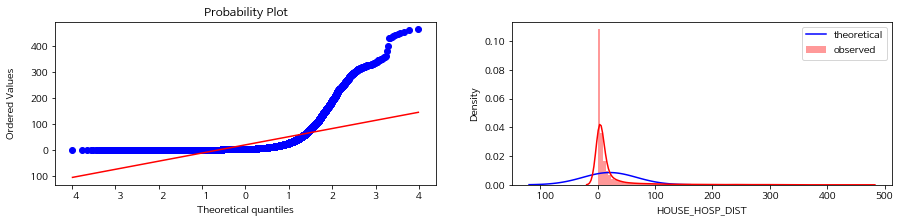


PAYM_AMT 의 가우시안 분포 확인


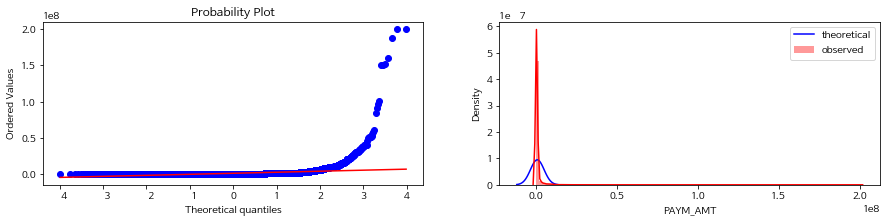


RCBASE_HSHD_INCM 의 가우시안 분포 확인


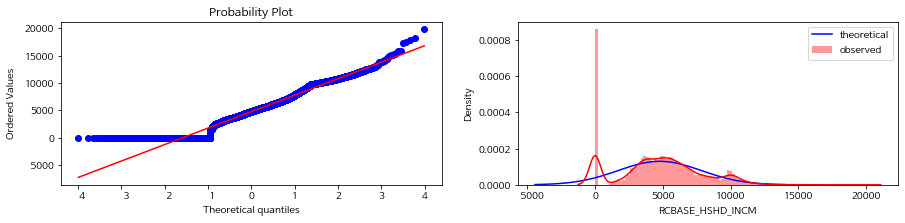


RESI_COST 의 가우시안 분포 확인


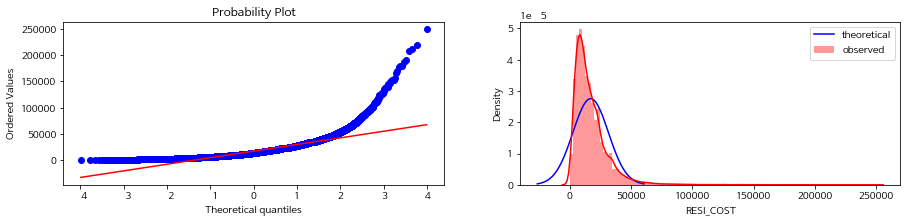


RESN_DATE_NUM 의 가우시안 분포 확인


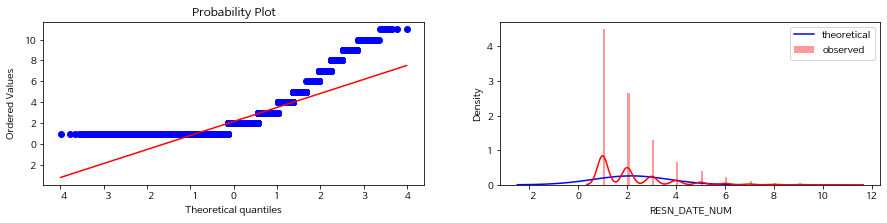


SUM_ORIG_PREM 의 가우시안 분포 확인


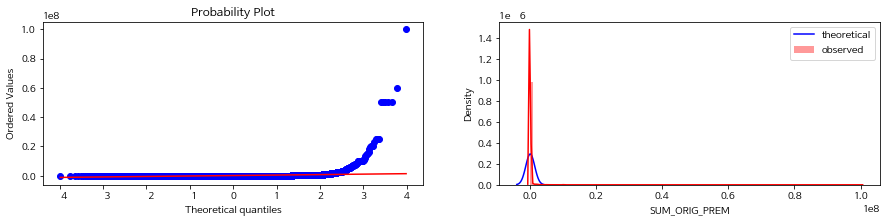


TOTALPREM 의 가우시안 분포 확인


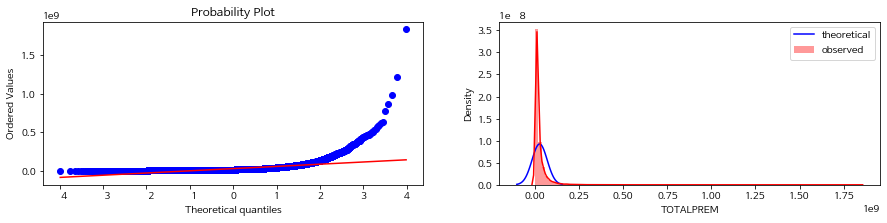

In [12]:
import scipy.stats as stats

for i in plot_target:
    print(i,"의 가우시안 분포 확인")
    fig = plt.figure(figsize=(15,3))
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)

    stats.probplot(copy_insurance[i], dist=stats.norm,plot=ax1)

    mu = copy_insurance[i].mean()
    variance = copy_insurance[i].var()
    sigma = variance ** 0.5
    x=np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    ax2.plot(x, stats.norm.pdf(x,mu,sigma), color="blue",label="theoretical")

    sns.distplot(ax=ax2, a=copy_insurance[i], bins=100, color="red", label="observed")
    ax2.legend()
    plt.show()
    print()

#### stats.kstest으로 가설검증하기
 - 귀무가설은 '정규분포를 따른다' 이다.

In [13]:
for i in plot_target:
    print(i,"귀무가설의 기각 여부 확인")
    test_state, p_val = stats.kstest(copy_insurance[i],'norm',args=(copy_insurance[i].mean(), copy_insurance[i].var()**0.5) )
    print("Test-statistics : {:.5f}, p-value : {:.5f}".format(test_state, p_val))
    print()

AGE 귀무가설의 기각 여부 확인
Test-statistics : 0.05453, p-value : 0.00000

CHLD_CNT 귀무가설의 기각 여부 확인
Test-statistics : 0.36416, p-value : 0.00000

CLAIM_NUM 귀무가설의 기각 여부 확인
Test-statistics : 0.25656, p-value : 0.00000

CUST_INCM 귀무가설의 기각 여부 확인
Test-statistics : 0.29274, p-value : 0.00000

CUST_RGST 귀무가설의 기각 여부 확인
Test-statistics : 0.30788, p-value : 0.00000

DISTANCE 귀무가설의 기각 여부 확인
Test-statistics : 0.27584, p-value : 0.00000

HOUSE_HOSP_DIST 귀무가설의 기각 여부 확인
Test-statistics : 0.32806, p-value : 0.00000

PAYM_AMT 귀무가설의 기각 여부 확인
Test-statistics : 0.42303, p-value : 0.00000

RCBASE_HSHD_INCM 귀무가설의 기각 여부 확인
Test-statistics : 0.11014, p-value : 0.00000

RESI_COST 귀무가설의 기각 여부 확인
Test-statistics : 0.13425, p-value : 0.00000

RESN_DATE_NUM 귀무가설의 기각 여부 확인
Test-statistics : 0.25856, p-value : 0.00000

SUM_ORIG_PREM 귀무가설의 기각 여부 확인
Test-statistics : 0.44341, p-value : 0.00000

TOTALPREM 귀무가설의 기각 여부 확인
Test-statistics : 0.27630, p-value : 0.00000



##### AGE를 제외한 모든 컬럼이 정규분포를 따르지 않으므로 MinMaxScaler를 이용해 정규화 적용

In [14]:
from sklearn.preprocessing import MinMaxScaler

int_data = copy_insurance[plot_target]

# 인덱스 빼두기 
index = int_data.index

# MinMaxcaler 객체 생성
scaler = MinMaxScaler()

# MinMaxcaler로 데이터 셋 변환 .fit( ) 과 .transform( ) 호출
scaler.fit(int_data)

data_scaled = scaler.transform(int_data)

# int_data.loc[:,:] = data_scaled

# transform( )시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
data_scaled = pd.DataFrame(data=data_scaled, columns=int_data.columns, index=index)

print('feature 들의 정규화 최소 값')
print(data_scaled.min())
print('\nfeature 들의 정규화 최대 값')
print(data_scaled.max())

feature 들의 정규화 최소 값
AGE                 0.0
CHLD_CNT            0.0
CLAIM_NUM           0.0
CUST_INCM           0.0
CUST_RGST           0.0
DISTANCE            0.0
HOUSE_HOSP_DIST     0.0
PAYM_AMT            0.0
RCBASE_HSHD_INCM    0.0
RESI_COST           0.0
RESN_DATE_NUM       0.0
SUM_ORIG_PREM       0.0
TOTALPREM           0.0
dtype: float64

feature 들의 정규화 최대 값
AGE                 1.0
CHLD_CNT            1.0
CLAIM_NUM           1.0
CUST_INCM           1.0
CUST_RGST           1.0
DISTANCE            1.0
HOUSE_HOSP_DIST     1.0
PAYM_AMT            1.0
RCBASE_HSHD_INCM    1.0
RESI_COST           1.0
RESN_DATE_NUM       1.0
SUM_ORIG_PREM       1.0
TOTALPREM           1.0
dtype: float64


##### label컬럼을 제외한 나머지 카테고리 데이터들은 원핫 인코딩을 진행

In [15]:
onehot_target = str_col(copy_insurance)

onehot_target.remove('SIU_CUST_YN')

str_data = copy_insurance[onehot_target]

onehot_data = pd.get_dummies(str_data)

['ACCI_DVSN', 'CUST_ROLE', 'DMND_RESN_CODE', 'FP_CAREER', 'HEED_HOSP_YN', 'MAXCRDT', 'MINCRDT', 'OCCP_GRP_1', 'RESI_TYPE_CODE', 'SEX', 'SIU_CUST_YN', 'WEDD_YN']


#### 인코딩과 스케일링 데이터, 라벨을 합쳐서 저장

In [16]:
concat_data = pd.concat([data_scaled, onehot_data, copy_insurance['SIU_CUST_YN']], axis=1)

concat_data.to_csv('./temp_data/save_scaled_insurance.csv',index = True)